In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from sklearn.cluster import KMeans

(1536, 2048, 3)


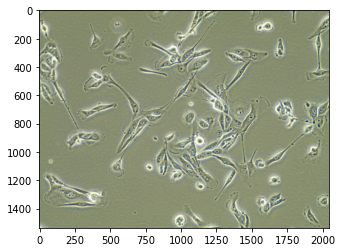

In [2]:
image = plt.imread('../data/images_jpeg/1401-8962.jpg')
print(image.shape)
#plt.imshow(image)

#### Image resize

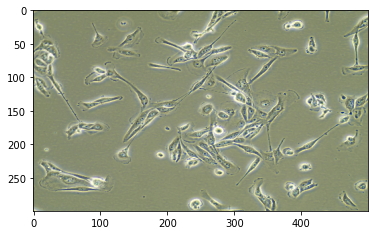

In [3]:
res = cv2.resize(image, dsize=(500,300))
plt.imshow(res)

#### Gray conversion

(300, 500)


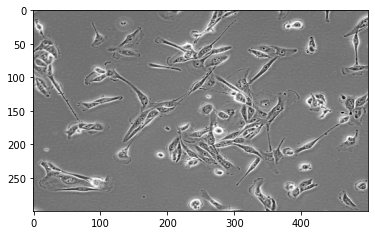

In [4]:
gray = rgb2gray(res)
print(gray.shape)
plt.imshow(gray, cmap='gray')

### Region-based Segmentation

#### Mean as threshold 

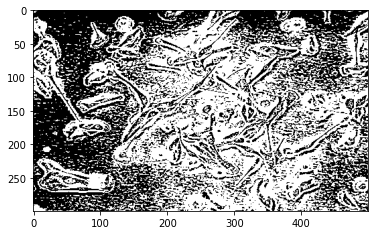

In [6]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

#### Multiple threshold

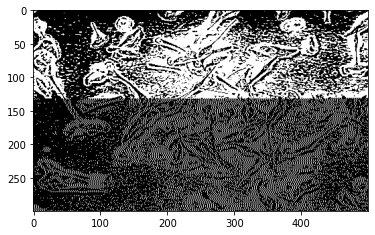

In [7]:
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 1:
        gray_r[i] = 2
    elif gray_r[i] > 1:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

### Image Segmentation based on Clustering

(1536, 2048, 3)


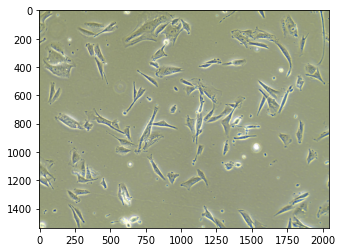

In [8]:
# dividing by 255 to bring the pixel values between 0 and 1
pic = plt.imread('../data/images_jpeg/1000-7807.jpg')/255  
print(pic.shape)
#plt.imshow(pic)

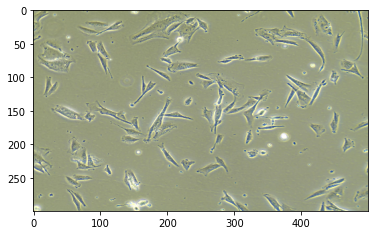

In [9]:
res = cv2.resize(pic, dsize=(500,300))
plt.imshow(res)

In [10]:
pic_n = res.reshape(res.shape[0]*res.shape[1], res.shape[2])
pic_n.shape

(150000, 3)

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

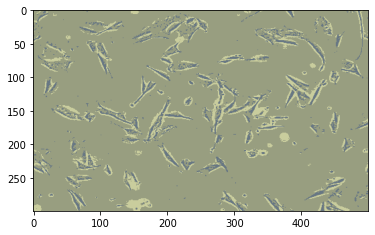

In [24]:
cluster_pic = pic2show.reshape(res.shape[0], res.shape[1], res.shape[2])
plt.imshow(cluster_pic)
plt.savefig('cluster.png', bbox_inches='tight', pad_inches=0)

### Cell profiler to detect cells

In [34]:
def combine_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [27]:
original = plt.imread('../cell_profiler/segmentation_experiments/original.jpg')
default = plt.imread('../cell_profiler/segmentation_experiments/default.png')
contrat = plt.imread('../cell_profiler/segmentation_experiments/contrast.png')
clust = plt.imread('../cell_profiler/segmentation_experiments/clustering_Overlay.png') 

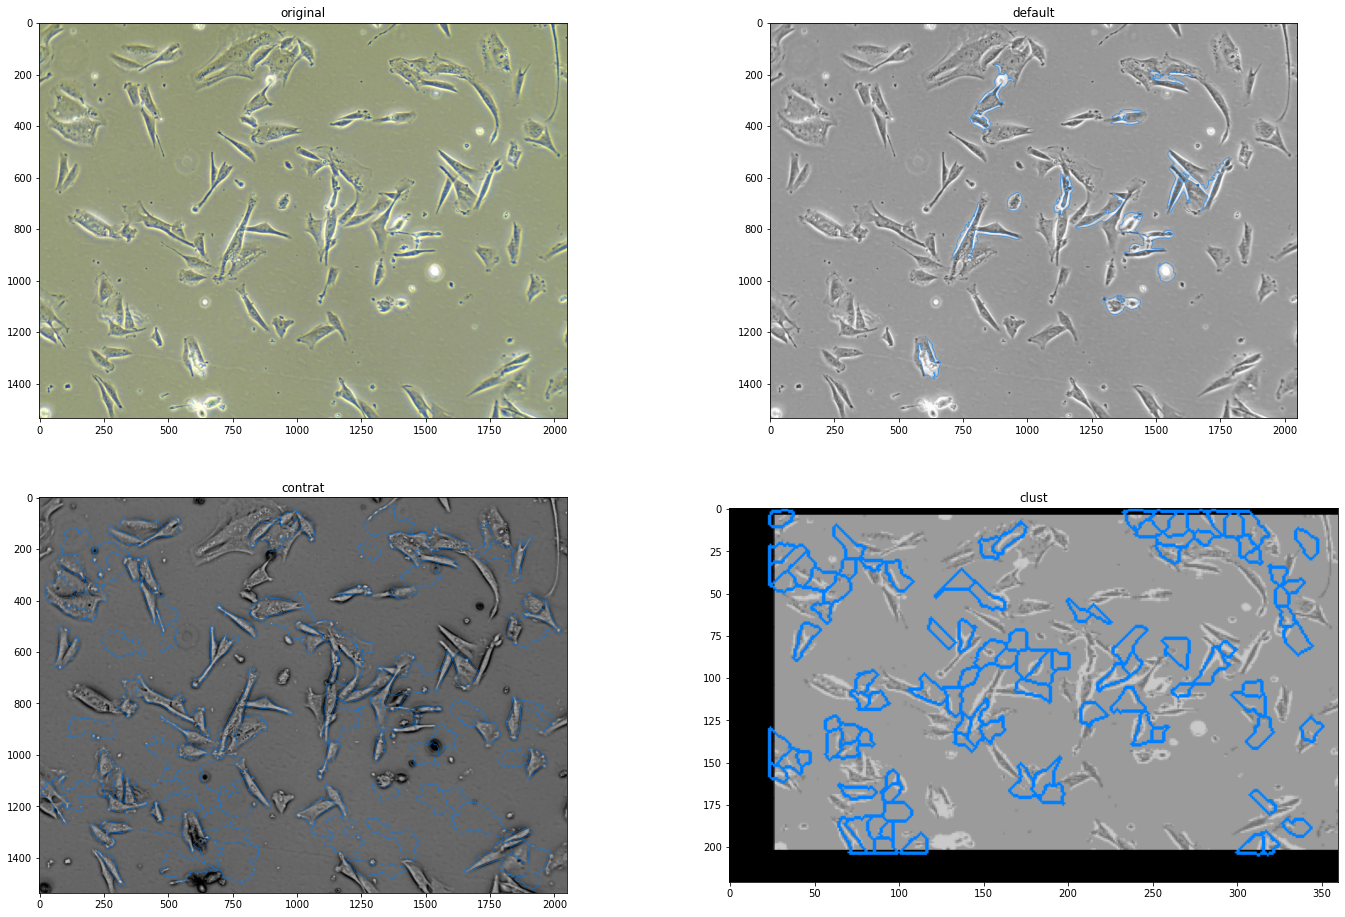

In [35]:
combine_images([original,default,contrat,clust], cols=2, titles= ['original','default','contrat','clust'] )